In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip the data
# !unzip /content/drive/MyDrive/30-12-2021/data.zip

In [ ]:
# import pre-trained imagenet model
from tensorflow.keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

from keras.preprocessing.image import ImageDataGenerator
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

58900480/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f19ed457710> False
<keras.layers.convolutional.Conv2D object at 0x7f19b5a0a310> False
<keras.layers.convolutional.Conv2D object at 0x7f19b6a160d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f19a00369d0> False
<keras.layers.convolutional.Conv2D object at 0x7f19a0059f10> False
<keras.layers.convolutional.Conv2D object at 0x7f19b85d2210> False
<keras.layers.pooling.MaxPooling2D object at 0x7f19a0061810> False
<keras.layers.convolutional.Conv2D object at 0x7f19a0065e50> False
<keras.layers.convolutional.Conv2D object at 0x7f19a0069e90> False
<keras.layers.convolutional.Conv2D object at 0x7f19a0058150> False
<keras.layers.pooling.MaxPooling2D object at 0x7f19367b5510> False
<keras.layers.convolutional.Conv2D object at 0x7f19367b8450> False
<keras.layers.convolutional.Conv2D object at 0x7f19367b50d0> False
<keras.layers.convolutional.Conv2D object at 0x7f19367bf310> F

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.models import load_model
import numpy as np
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 40,933,189
Trainable params: 33,297,925
No

In [ ]:
# path to data directories
train_dir = '/content/drive/MyDrive/exercise/train'
validation_dir = '/content/drive/MyDrive/exercise/val'
test_dir = '/content/drive/MyDrive/exercise/test'

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
#       rotation_range=20,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
test_batchsize = 10

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical')

Found 2403 images belonging to 5 classes.
Found 514 images belonging to 5 classes.
Found 514 images belonging to 5 classes.


In [ ]:
# Classes
print (train_generator.class_indices)

{'arms_wrong_angle': 0, 'good': 1, 'head_low': 2, 'hips_high': 3, 'hips_low': 4}


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50 ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/10
50/50 [==============================] - 93s 2s/step - loss: 0.4417 - acc: 0.8875 - val_loss: 0.4632 - val_acc: 0.8735
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 0.0659 - acc: 0.9775 - val_loss: 0.3627 - val_acc: 0.9047
Epoch 3/10
50/50 [==============================] - 79s 2s/step - loss: 0.0413 - acc: 0.9837 - val_loss: 0.2739 - val_acc: 0.9144
Epoch 4/10
50/50 [==============================] - 78s 2s/step - loss: 0.0263 - acc: 0.9898 - val_loss: 0.4300 - val_acc: 0.9455
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 0.0939 - acc: 0.9912 - val_loss: 0.3919 - val_acc: 0.9455
Epoch 6/10
50/50 [==============================] - 78s 2s/step - loss: 0.0165 - acc: 0.9962 - val_loss: 0.3118 - val_acc: 0.9455
Epoch 7/10
50/50 [==============================] - 77s 2s/step - loss: 0.0231 - acc: 0.9937 - val_loss: 0.1360 - val_acc: 0.9708
Epoch 8/10
50/50 [==============================] - 79s 2s/step - loss: 0.0092 - acc: 0.99

In [ ]:
model.save('exercise.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/fivo/30-12-2021/exercise.h5')

In [ ]:
# Name of classes
class_names=['arms_wrong_angle',
         'good',
         'head_low',
         'hips_high',
         'hips_low']

class_names=np.array(class_names)

In [ ]:
# Testing the model
image_batch, label_batch = next(iter(test_generator))
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
label_batch  = np.argmax(label_batch , axis=-1)
print(predicted_class_names)

['good' 'arms_wrong_angle' 'good' 'good' 'good' 'good' 'hips_high'
 'hips_high' 'good' 'hips_high']


In [ ]:
# printing the original and predicted labels
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [4 0 1 1 1 1 3 3 1 3]
Predicted labels:  [1 0 1 1 1 1 3 3 1 3]


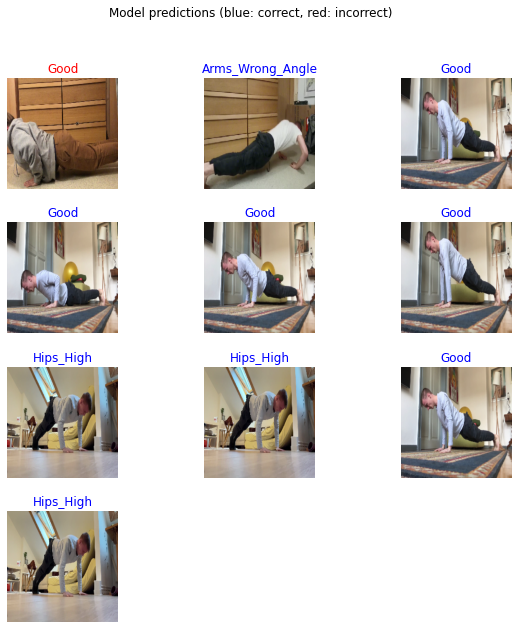

In [ ]:
# visuzlizng the results
plt.figure(figsize=(10,10))
for n in range(10):
    plt.subplot(4,3,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")